In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
# 캘리포니아 주택 가격 데이터 로드
housing = fetch_california_housing(as_frame=True)
df = housing.frame 

In [6]:
# 데이터 기본 정보 출력
print("📌 데이터 정보:")
print(df.info())

print("\n📌 데이터 샘플:")
print(df.head())

📌 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

📌 데이터 샘플:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.5479

In [7]:
# 상관계수 행렬 계산
corr_matrix = df.corr()

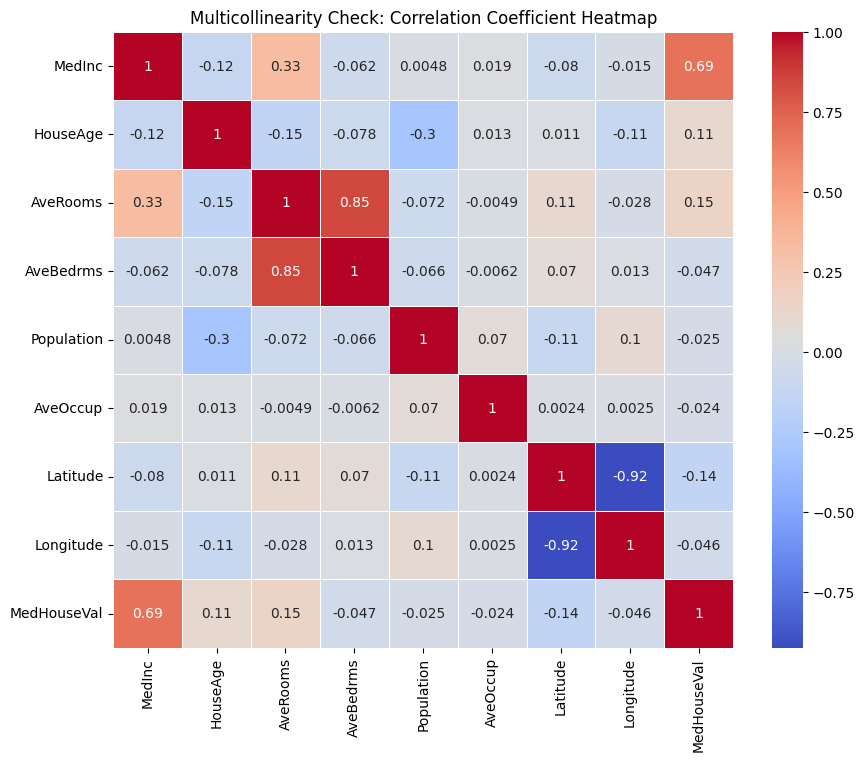

In [8]:
# 히트맵을 통한 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Multicollinearity Check: Correlation Coefficient Heatmap')
plt.show()

In [11]:
# 회귀 모델 준비: 목표 변수는 'MedHouseVal'
target = df['MedHouseVal']

# Model A: 모든 피처 사용 (MedInc와 AveBedrms 포함)
features_A = df.drop(columns=['MedHouseVal'])

# Model B: 중복 변수 제거 (AveBedrms 제거)
features_B = df.drop(columns=['MedHouseVal', 'AveBedrms'])

In [13]:
# 데이터 분할 (훈련: 80%, 테스트: 20%)
X_A_train, X_A_test, y_train, y_test = train_test_split(features_A, target, test_size=0.2, random_state=42)
X_B_train, X_B_test, _, _ = train_test_split(features_B, target, test_size=0.2, random_state=42)

In [14]:
# 선형 회귀 모델 학습
model_A = LinearRegression().fit(X_A_train, y_train)
model_B = LinearRegression().fit(X_B_train, y_train)

In [15]:
# 7. 예측 및 모델 평가
y_pred_A = model_A.predict(X_A_test)
y_pred_B = model_B.predict(X_B_test)
r2_A = model_A.score(X_A_test, y_test)
r2_B = model_B.score(X_B_test, y_test)
mse_A = mean_squared_error(y_test, y_pred_A)
mse_B = mean_squared_error(y_test, y_pred_B)

print("=== Model A (with duplicate variable) ===")
print("Coefficients:")
print(pd.Series(model_A.coef_, index=X_A_train.columns))
print("Intercept:", model_A.intercept_)
print("R^2:", r2_A)
print("MSE:", mse_A)

print("\n=== Model B (without duplicate variable) ===")
print("Coefficients:")
print(pd.Series(model_B.coef_, index=X_B_train.columns))
print("Intercept:", model_B.intercept_)
print("R^2:", r2_B)
print("MSE:", mse_B)

=== Model A (with duplicate variable) ===
Coefficients:
MedInc        0.448675
HouseAge      0.009724
AveRooms     -0.123323
AveBedrms     0.783145
Population   -0.000002
AveOccup     -0.003526
Latitude     -0.419792
Longitude    -0.433708
dtype: float64
Intercept: -37.02327770606399
R^2: 0.575787706032451
MSE: 0.5558915986952442

=== Model B (without duplicate variable) ===
Coefficients:
MedInc        0.371939
HouseAge      0.009792
AveRooms      0.019116
Population   -0.000003
AveOccup     -0.003237
Latitude     -0.457872
Longitude    -0.464572
dtype: float64
Intercept: -38.9758615951395
R^2: 0.5823239094526447
MSE: 0.5473264990498133


##  결론

중복 변수를 제거한 Model B는 불필요한 중복 정보를 제거하여 해석이 용이하며,
성능(R^2, MSE)은 유사하게 유지되어 모델 단순화의 장점을 확인할 수 있습니다.